## Kaggle – DataTops®
Luismi ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a Luismi a mejorar ese modelo?

## Métrica: 
Error de raíz cuadrada media (RMSE) es la desviación estándar de los valores residuales (errores de predicción). Los valores residuales son una medida de la distancia de los puntos de datos de la línea de regresión; RMSE es una medida de cuál es el nivel de dispersión de estos valores residuales. En otras palabras, le indica el nivel de concentración de los datos en la línea de mejor ajuste.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## Librerías

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import bootcampviztools as bt

from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import urllib.request

## Datos

In [59]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("./data/train.csv", index_col = "laptop_ID")
df.index.name = None

## Exploración de los datos

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [61]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [62]:
df["inches_num"] = df["Inches"]
df["weight_kg"] = df["Weight"].str.replace("kg", "").astype(float)
df["ram_gb"] = df["Ram"].str.replace("GB", "").astype(float)

In [63]:
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,inches_num,weight_kg,ram_gb
1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00,15.6,2.36,8.0
1013,HP,EliteBook 840,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.48kg,2089.00,14.0,1.48,8.0
920,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,789.00,15.6,2.60,8.0
514,Acer,Aspire A515-51G-59QF,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4GB,1TB HDD,Nvidia GeForce MX150,Windows 10,2.2kg,613.00,15.6,2.20,4.0
364,Dell,Inspiron 3567,Notebook,15.6,Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,Windows 10,2.36kg,557.37,15.6,2.36,8.0


In [64]:
df.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,inches_num,weight_kg,ram_gb
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00,15.6,2.20,8.0
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00,13.3,1.48,8.0
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00,15.6,2.20,8.0
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00,15.6,1.86,4.0
229,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42kg,2456.34,17.3,4.42,16.0


In [65]:
df.describe()

,Inches,Price_in_euros,inches_num,weight_kg,ram_gb
count,912.000000,912.000000,912.000000,912.000000,912.000000
mean,14.981579,1111.724090,14.981579,2.026937,8.263158
std,1.436719,687.959172,1.436719,0.665466,5.044788
min,10.100000,174.000000,10.100000,0.690000,2.000000
25%,14.000000,589.000000,14.000000,1.490000,4.000000
50%,15.600000,978.000000,15.600000,2.040000,8.000000
75%,15.600000,1483.942500,15.600000,2.300000,8.000000
max,18.400000,6099.000000,18.400000,4.700000,64.000000


Nuestro target es la columna `Price_in_euros`

--------------------------------

### 1. Dividir train_set, test_set

In [66]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42) 

In [67]:
target = ["Price_in_euros"]

### 2. Definir X_train, y_train, X_test, y_test

In [68]:
X_train = train_set.drop(target, axis = 1).copy()
y_train = train_set[target].copy()

X_test = test_set.drop(target, axis = 1).copy()
y_test = test_set[target].copy()

In [69]:
X_train.shape

(729, 14)

In [70]:
y_train.shape

(729, 1)

In [71]:
X_test.shape

(183, 14)

In [72]:
y_test.shape

(183, 1)

## Procesado de datos

### Mini-EDA

In [73]:
# Features numéricas
## Bivariante  -> target con todas las demas

In [74]:
corr = train_set.corr(numeric_only = True)
corr

,Inches,Price_in_euros,inches_num,weight_kg,ram_gb
Inches,1.000000,0.051334,1.000000,0.840143,0.232868
Price_in_euros,0.051334,1.000000,0.051334,0.202341,0.744269
inches_num,1.000000,0.051334,1.000000,0.840143,0.232868
weight_kg,0.840143,0.202341,0.840143,1.000000,0.376495
ram_gb,0.232868,0.744269,0.232868,0.376495,1.000000


In [75]:
corr["Price_in_euros"].sort_values(ascending = False)

Price_in_euros    1.000000
ram_gb            0.744269
weight_kg         0.202341
inches_num        0.051334
Inches            0.051334
Name: Price_in_euros, dtype: float64

In [76]:
features_num = ["ram_gb" , "weight_kg"]

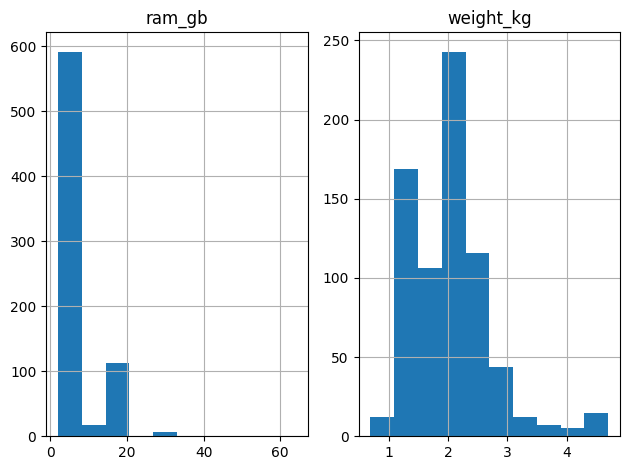

In [77]:
train_set[features_num].hist()
plt.tight_layout()

In [78]:
features_num_transform = features_num.copy()

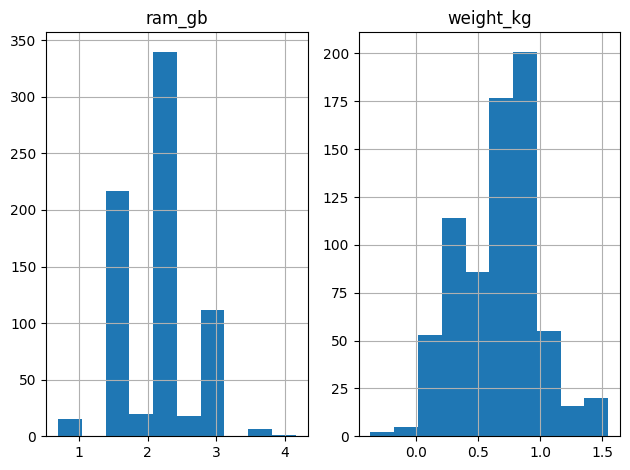

In [79]:
# Aplico transformación logarítmica a estas variables
for feature in features_num_transform:
    train_set[feature] = train_set[feature].apply(np.log)

train_set[features_num_transform].hist()
plt.tight_layout();

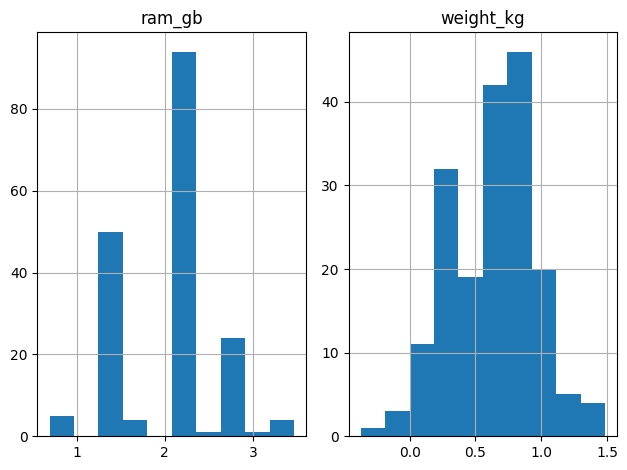

In [80]:
# Aplico transformación logarítmica a estas variables
for feature in features_num_transform:
    test_set[feature] = test_set[feature].apply(np.log)

test_set[features_num_transform].hist()
plt.tight_layout();

In [81]:
# Escalamos numéricas // Escalar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_set[features_num]) # Entreno solo con datos de train

StandardScaler()

In [82]:
# Aplico escalado a ambos sets, train y test
train_set[features_num] = scaler.transform(train_set[features_num])
test_set[features_num] = scaler.transform(test_set[features_num])

In [83]:
train_set[features_num].describe() # Ahora la desviación estándar (std) de todas las numéricas de train es 1

,ram_gb,weight_kg
count,7.290000e+02,7.290000e+02
mean,-5.494766e-16,-1.462022e-17
std,1.000687e+00,1.000687e+00
min,-2.443779e+00,-3.263508e+00
25%,-1.114517e+00,-8.048810e-01
50%,2.147450e-01,1.686696e-01
75%,2.147450e-01,5.484818e-01
max,4.202531e+00,2.811200e+00


In [84]:
test_set[features_num].describe() # Ahora la desviación estándar (std) de todas las numéricas de train es 1

,ram_gb,weight_kg
count,183.000000,183.000000
mean,0.015063,-0.057018
std,1.030649,1.022542
min,-2.443779,-3.263508
25%,-1.114517,-0.912219
50%,0.214745,0.105971
75%,0.214745,0.555350
max,2.873269,2.616725


In [85]:
# Features categóricas

In [86]:
X_train["Company"].value_counts()

Company
Lenovo       162
Dell         158
HP           155
Asus         101
Acer          55
Toshiba       31
MSI           30
Apple         13
Mediacom       4
Razer          4
Xiaomi         3
Samsung        3
Microsoft      3
Google         2
Fujitsu        2
Vero           2
Chuwi          1
Name: count, dtype: int64

In [87]:
X_train["TypeName"].value_counts()

TypeName
Notebook              412
Gaming                113
Ultrabook             113
2 in 1 Convertible     62
Netbook                16
Workstation            13
Name: count, dtype: int64

In [88]:
X_train["Cpu"].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       100
Intel Core i7 7700HQ 2.8GHz       82
Intel Core i7 7500U 2.7GHz        77
Intel Core i5 8250U 1.6GHz        46
Intel Core i7 8550U 1.8GHz        40
                                ... 
Intel Core i5 7500U 2.7GHz         1
Intel Core i3 6100U 2.1GHz         1
Intel Core M 1.1GHz                1
Intel Xeon E3-1535M v5 2.9GHz      1
AMD E-Series 6110 1.5GHz           1
Name: count, Length: 93, dtype: int64

In [89]:
X_train["Memory"].value_counts()

Memory
256GB SSD                 226
1TB HDD                   122
500GB HDD                  80
512GB SSD                  62
128GB SSD +  1TB HDD       56
128GB SSD                  45
256GB SSD +  1TB HDD       43
32GB Flash Storage         23
1TB SSD                     8
64GB Flash Storage          8
256GB Flash Storage         7
512GB SSD +  1TB HDD        6
256GB SSD +  2TB HDD        6
2TB HDD                     6
16GB Flash Storage          4
128GB Flash Storage         4
1.0TB Hybrid                3
32GB SSD                    3
512GB SSD +  2TB HDD        2
180GB SSD                   2
8GB SSD                     1
1TB SSD +  1TB HDD          1
128GB HDD                   1
240GB SSD                   1
512GB Flash Storage         1
512GB SSD +  512GB SSD      1
1TB HDD +  1TB HDD          1
1.0TB HDD                   1
256GB SSD +  256GB SSD      1
16GB SSD                    1
128GB SSD +  2TB HDD        1
508GB Hybrid                1
64GB SSD                    1
Nam

In [90]:
# companies = [[
#     "Apple",
#     "Razer",
#     "Microsoft",
#     "Google",
#     "MSI",
#     "Dell",
#     "Lenovo",
#     "Asus",
#     "HP",
#     "Samsung",
#     "Fujitsu",
#     "Acer",
#     "Toshiba",
#     "Xiaomi",
#     "Mediacom",
#     "Vero",
#     "Chuwi"
# ]]

In [91]:
from sklearn.preprocessing import OrdinalEncoder
# ordinal_encoder = OrdinalEncoder(categories= companies)

# train_set["ordinal_company"] = ordinal_encoder.fit_transform(train_set[["Company"]])
# test_set["ordinal_company"] = ordinal_encoder.transform(test_set[["Company"]])

In [92]:
# train_set[["ordinal_company","Company"]].sample(5)

In [93]:
types = [[
    "Workstation",        
    "Gaming",             
    "Ultrabook",          
    "2 in 1 Convertible", 
    "Notebook",           
    "Netbook"             
]]

In [94]:
ordinal_encoder_types = OrdinalEncoder(categories= types)

train_set["ordinal_types"] = ordinal_encoder_types.fit_transform(train_set[["TypeName"]])
test_set["ordinal_types"] = ordinal_encoder_types.transform(test_set[["TypeName"]])

In [95]:
train_set[["ordinal_types","TypeName"]].sample(5)


,ordinal_types,TypeName
837,5.0,Netbook
229,1.0,Gaming
579,4.0,Notebook
932,1.0,Gaming
169,1.0,Gaming


In [96]:
# features_cat = ["ordinal_company" , "ordinal_types"]
features_cat = ["ordinal_types"]

In [97]:
X_train = train_set[features_num + features_cat].copy()
X_test = test_set[features_num + features_cat].copy()

----------------------------------------------------------------------------------------------------------------

## Modelado

### 3. Baseline de modelos


In [98]:
model = RandomForestRegressor(random_state = 42)
model.fit(X_train, y_train)

c:\Users\María Moya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [99]:
y_pred = model.predict(X_test)

### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [100]:
root_mean_squared_error(y_test, y_pred)

469.5745052212928

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [101]:
X_pred = pd.read_csv("./data/test.csv", index_col = "laptop_ID")
X_pred.index.name = None
X_pred.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


In [102]:
X_pred["inches_num"] = X_pred["Inches"]
X_pred["weight_kg"] = X_pred["Weight"].str.replace("kg", "").astype(float)
X_pred["ram_gb"] = X_pred["Ram"].str.replace("GB", "").astype(float)

In [103]:
# Aplico transformación logarítmica a estas variables
for feature in features_num_transform:
    X_pred[feature] = X_pred[feature].apply(np.log)

In [104]:
# Escalo "ordinal_types"
X_pred["ordinal_types"] = ordinal_encoder_types.transform(X_pred[["TypeName"]])

In [105]:
X_pred.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,inches_num,weight_kg,ram_gb,ordinal_types
330,Acer,Aspire 5,Notebook,15.6,1366x768,AMD A12-Series 9720P 2.7GHz,8GB,256GB SSD,AMD Radeon RX 540,Windows 10,2.2kg,15.6,0.788457,2.079442,4.0
588,Dell,Latitude 5580,Notebook,15.6,1366x768,Intel Core i5 7300U 2.6GHz,8GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.9kg,15.6,0.641854,2.079442,4.0
320,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.33kg,15.6,0.845868,2.079442,4.0
150,Asus,X541NA (N3350/4GB/1TB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4GB,1TB HDD,Intel HD Graphics 500,Windows 10,2kg,15.6,0.693147,1.386294,4.0
782,Dell,Inspiron 7567,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.62kg,15.6,0.963174,2.079442,1.0


In [106]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           391 non-null    object 
 1   Product           391 non-null    object 
 2   TypeName          391 non-null    object 
 3   Inches            391 non-null    float64
 4   ScreenResolution  391 non-null    object 
 5   Cpu               391 non-null    object 
 6   Ram               391 non-null    object 
 7   Memory            391 non-null    object 
 8   Gpu               391 non-null    object 
 9   OpSys             391 non-null    object 
 10  Weight            391 non-null    object 
 11  inches_num        391 non-null    float64
 12  weight_kg         391 non-null    float64
 13  ram_gb            391 non-null    float64
 14  ordinal_types     391 non-null    float64
dtypes: float64(5), object(10)
memory usage: 48.9+ KB


 ## 2. Replicar el procesado para ``test.csv``

In [107]:
features = features_num + features_cat

In [108]:
X_pred_1 = X_pred[features].copy()

In [109]:
predictions_submit = model.predict(X_pred_1)
predictions_submit

array([4435.44977222, 1662.89333651, 1392.3927    , 1505.11925722,
       1392.3927    , 1676.03076984, 1392.3927    , 1398.67644444,
       2695.09593651, 1377.01791333, 4692.2286    , 2181.9018    ,
       1418.08311111, 4671.68231746, 1392.3927    , 1071.74783333,
       4687.04571984, 1971.2078    , 1957.18939524, 1751.11660317,
       4671.68231746, 1615.08936667, 1681.27076984, 1953.77969524,
       1751.11660317, 1752.48280317, 1681.27076984, 1939.60563333,
       4684.54      , 1092.50568667, 4767.66567691, 1522.9142    ,
       1392.3927    , 4708.38      , 4748.1287    , 4574.57633333,
       1752.48280317, 4423.17392333, 1690.54313651, 1871.0522    ,
       1522.9142    , 2161.27573333, 1522.9142    , 1092.50568667,
       2463.21444444, 1394.74165404, 1468.18846667, 1522.9142    ,
       1752.48280317, 1752.48280317, 4637.37423333, 1752.48280317,
       1107.34154   , 1392.3927    , 1797.86189524, 4661.49212857,
       1752.48280317, 1644.87558651, 1564.92707143, 1418.08311

**¡OJO! ¿Por qué me da error?** 

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [110]:
# ¿Qué opináis?
# ¿Sí, no?

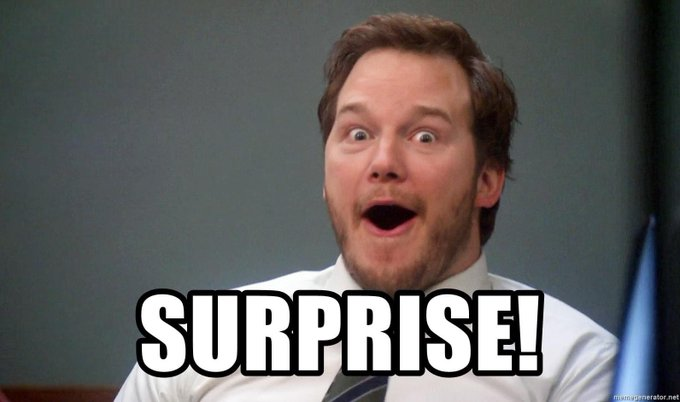

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [111]:
sample = pd.read_csv("./data/sample_submission.csv")

In [112]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [113]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [114]:
#¿Cómo creamos la submission?
submission = pd.DataFrame({"laptop_ID": X_pred.index , "Price_in_euros": predictions_submit})

In [115]:
submission.head()

,laptop_ID,Price_in_euros
0,209,4435.449772
1,1281,1662.893337
2,1168,1392.392700
3,1231,1505.119257
4,1020,1392.392700


In [116]:
submission.shape

(391, 2)

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [117]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [118]:
chequeador(submission)

You're ready to submit!
